To get the data [iNaturalist Research-grade Observations](https://www.gbif.org/dataset/50c9509d-22c7-4a22-a47d-8c48425ef4a7) run this in the terminal


```bash
mkdir data
cd data
wget https://api.gbif.org/v1/occurrence/download/request/0011012-251025141854904.zip
unzip 0011012-251025141854904.zip
```

In [1]:
import duckdb
import pandas as pd

pd.set_option('display.max_columns', None)

In [ ]:
# # Run this only once

# # Create or connect to a persistent DB
# con = duckdb.connect('data/iNaturalist.duckdb')
# print("connected")

# # Import TSV once
# con.execute("""
#     CREATE TABLE IF NOT EXISTS iNaturalist AS
#         SELECT * 
#         FROM read_csv_auto('../data/0011983-251025141854904.csv', sep='\t', header=True);
# """)
# print("created iNaturalist.duckdb")

# # Optionally add indexes
# con.execute("PRAGMA enable_object_cache;")
# print("add indexes")


# # Query repeatedly without rereading the TSV
# result = con.execute("""
#     SELECT COUNT(*)
#     FROM iNaturalist

# """).df()

# result.head()

connected


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [2]:
con = duckdb.connect('data/iNaturalist.duckdb')
print("connected!")

connected!


In [3]:
query = """
SELECT COUNT(*) AS observation_count
FROM iNaturalist
"""
df = con.execute(query).df()
df

,observation_count
0,131805543


In [4]:
query = """
SELECT *
FROM iNaturalist
LIMIT 5
"""
df = con.execute(query).df()
df

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2611038174,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43654354,Animalia,Chordata,Aves,Passeriformes,Fringillidae,Fringilla,Fringilla coelebs,None,SPECIES,"Fringilla coelebs Linnaeus, 1758",Fringilla coelebs,None,IT,None,Trentino-Alto Adige,PRESENT,None,28eb1a3f-1c15-4a95-931a-4af90ecb574d,46.457462,11.350595,191.0,None,None,None,None,None,2020-04-25T11:36,25,4,2020,2494422,2494422,HUMAN_OBSERVATION,iNaturalist,Observations,43654354,None,Zenzi Martin,2020-04-26 16:33:25,CC_BY_NC_4_0,Zenzi Martin,Zenzi Martin,None,None,2025-10-27 17:39:56.471000-04:00,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,3759886423,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43734599,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Caryophyllaceae,Rabelera,Rabelera holostea,None,SPECIES,Rabelera holostea (L.) M.T.Sharples & E.A.Tripp,Rabelera holostea,None,GB,None,England,PRESENT,None,28eb1a3f-1c15-4a95-931a-4af90ecb574d,53.379203,-1.552363,10.0,None,None,None,None,None,2020-04-26T14:15:55,26,4,2020,11071158,11071158,HUMAN_OBSERVATION,iNaturalist,Observations,43734599,None,alexandraw,2020-04-26 21:17:38,CC_BY_NC_4_0,alexandraw,alexandraw,None,None,2025-10-27 17:39:57.289000-04:00,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,2611019014,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43807480,Plantae,Tracheophyta,Magnoliopsida,Ericales,Balsaminaceae,Impatiens,Impatiens capensis,None,SPECIES,Impatiens capensis Meerb.,Impatiens capensis,None,US,None,North Carolina,PRESENT,None,28eb1a3f-1c15-4a95-931a-4af90ecb574d,35.600900,-82.554000,NaN,None,None,None,None,None,2020-04-26T17:23:56,26,4,2020,2891774,2891774,HUMAN_OBSERVATION,iNaturalist,Observations,43807480,None,buncombe_nc,2020-04-27 02:09:10,CC_BY_NC_4_0,buncombe_nc,buncombe_nc,None,None,2025-10-27 17:39:58.259000-04:00,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NO...
3,2611046845,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43879887,Animalia,Chordata,Aves,Passeriformes,Icteridae,Quiscalus,Quiscalus quiscula,None,SPECIES,"Quiscalus quiscula (Linnaeus, 1758)",Quiscalus quiscula,None,CA,None,New Brunswick,PRESENT,None,28eb1a3f-1c15-4a95-931a-4af90ecb574d,45.442452,-65.957794,1953.0,None,None,None,None,None,2020-04-22T01:19,22,4,2020,2484155,2484155,HUMAN_OBSERVATION,iNaturalist,Observations,43879887,None,James Russell,2020-04-27 12:52:24,CC_BY_NC_4_0,James Russell,James Russell,None,None,2025-10-27 17:39:59.434000-04:00,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,2611265361,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43979165,Animalia,Chordata,Testudines,None,Emydidae,Trachemys,Trachemys scripta,elegans,SUBSPECIES,"Trachemys scripta elegans (Wied, 1838)",Trachemys scripta elegans,None,US,None,Texas,PRESENT,None,28eb1a3f-1c15-4a95-931a-4af90ecb574d,29.666955,-95.485904,30.0,None,None,None,None,None,2020-04-27T15:27:23Z,27,4,2020,6157026,2443002,HUMAN_OBSERVATION,iNaturalist,Observations,43979165,None,Roberto R. Calderón,2020-04-27 20:28:39,CC_BY_NC_4_0,lsenroy,lsenroy,None,None,2025-10-27 17:40:00.927000-04:00,StillImage;StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


In [5]:
query = """
SELECT verbatimScientificName, COUNT(*) AS observation_count
FROM iNaturalist
GROUP BY verbatimScientificName
ORDER BY observation_count DESC
"""

df = con.execute(query).df()
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,verbatimScientificName,observation_count
0,Anas platyrhynchos,492526
1,Apis mellifera,423811
2,Harmonia axyridis,318474
3,Passer domesticus,307389
4,Danaus plexippus,297037
...,...,...
483980,Haemanota maculosa,1
483981,Rhododendron racemosum,1
483982,Cotyclytus cristatus,1
483983,Callista multiradiata,1


In [ ]:
# query = """
# SELECT 
#     verbatimScientificName,
#     STRFTIME(
#         TRY_STRPTIME(eventDate, ['%Y-%m-%dT%H:%M:%S', '%Y-%m-%dT%H:%M', '%Y-%m-%d']),
#         '%Y-%m-%d %H:%M:%S'
#     ) AS eventDate,
#     decimalLatitude,
#     decimalLongitude,
#     countryCode
# FROM iNaturalist
# WHERE 
#     decimalLatitude IS NOT NULL
#     AND decimalLongitude IS NOT NULL
#     AND eventDate IS NOT NULL
# LIMIT 10
# """

# df = con.execute(query).df()
# df

,verbatimScientificName,eventDate,decimalLatitude,decimalLongitude,countryCode
0,Torenia concolor,2023-09-24 10:00:00,23.912801,120.887476,TW
1,Samolus parviflorus,2023-09-24 15:57:17,40.192580,-85.400362,US
2,Harpaphe haydeniana,2020-05-24 16:33:17,37.262108,-122.241436,US
3,Polistes dominula,2020-05-26 11:07:43,40.701724,-73.996270,US
4,Mergus merganser,2020-05-08 00:00:00,45.501143,-122.306145,US
5,Bombus pratorum,2020-05-26 12:59:00,52.490877,13.321534,DE
6,Lotus corniculatus,2020-05-28 17:41:36,38.968353,-84.430620,US
7,Anthriscus sylvestris,2020-05-29 16:35:00,55.824916,37.573990,RU
8,Lamium galeobdolon,2020-05-30 13:08:05,50.975306,14.037483,DE
9,Setophaga magnolia,2020-05-30 09:20:00,43.945995,-76.879598,CA


In [6]:
query = """
WITH clean_iNaturalist AS (
    SELECT
        verbatimScientificName,
        STRFTIME(
            TRY_STRPTIME(eventDate, ['%Y-%m-%dT%H:%M:%S', '%Y-%m-%dT%H:%M', '%Y-%m-%d']),
            '%Y-%m-%d'
        ) AS dateOcurrence,  -- keep only the date part
        decimalLatitude,
        decimalLongitude,
        countryCode
    FROM iNaturalist
    WHERE
        decimalLatitude IS NOT NULL
        AND decimalLongitude IS NOT NULL
        AND eventDate IS NOT NULL AND TRIM(eventDate) <> '' 
        AND dateOcurrence IS NOT NULL AND TRIM(dateOcurrence) <> ''
        AND TRY_STRPTIME(eventDate, ['%Y-%m-%dT%H:%M:%S', '%Y-%m-%dT%H:%M', '%Y-%m-%d']) > TIMESTAMP '2025-01-01'
        AND verbatimScientificName = 'Danaus plexippus'
)

SELECT
    verbatimScientificName,
    dateOcurrence,
    decimalLatitude,
    decimalLongitude,
    countryCode,
    COUNT(*) AS countOccurrences
FROM clean_iNaturalist
GROUP BY
    verbatimScientificName,
    dateOcurrence,
    decimalLatitude,
    decimalLongitude,
    countryCode
ORDER BY
    dateOcurrence;
"""
df = con.execute(query).df()
df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences
0,Danaus plexippus,2025-01-01,18.369262,-65.634262,PR,1
1,Danaus plexippus,2025-01-01,-25.545925,152.585499,AU,1
2,Danaus plexippus,2025-01-01,28.024186,-82.702188,US,1
3,Danaus plexippus,2025-01-01,-34.962649,138.561909,AU,1
4,Danaus plexippus,2025-01-01,35.130113,-120.632645,US,7
...,...,...,...,...,...,...
54040,Danaus plexippus,2025-10-21,34.234097,-119.001381,US,1
54041,Danaus plexippus,2025-10-21,33.012233,-83.734720,US,1
54042,Danaus plexippus,2025-10-21,37.885718,-122.298297,US,1
54043,Danaus plexippus,2025-10-21,30.070267,-95.739158,US,1


In [7]:
# Aggregate by date and time
query = """
WITH clean_iNaturalist AS (
    SELECT
        verbatimScientificName,
        STRFTIME(
            TRY_STRPTIME(eventDate, ['%Y-%m-%dT%H:%M:%S', '%Y-%m-%dT%H:%M', '%Y-%m-%d']),
            '%Y-%m-%d %H:%M:%S'
        ) AS dateOcurrence,  -- keep full datetime
        decimalLatitude,
        decimalLongitude,
        countryCode
    FROM iNaturalist
    WHERE
        decimalLatitude IS NOT NULL
        AND decimalLongitude IS NOT NULL
        AND eventDate IS NOT NULL AND TRIM(eventDate) <> ''
        AND TRY_STRPTIME(eventDate, ['%Y-%m-%dT%H:%M:%S', '%Y-%m-%dT%H:%M', '%Y-%m-%d']) > TIMESTAMP '2000-01-01'
        AND verbatimScientificName = 'Danaus plexippus'
)

SELECT
    verbatimScientificName,
    dateOcurrence,
    decimalLatitude,
    decimalLongitude,
    countryCode,
    COUNT(*) AS countOccurrences
FROM clean_iNaturalist
GROUP BY
    verbatimScientificName,
    dateOcurrence,
    decimalLatitude,
    decimalLongitude,
    countryCode
ORDER BY
    dateOcurrence;
"""

df = con.execute(query).df()
df


,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences
0,Danaus plexippus,2000-01-29 19:46:00,35.263600,-120.638700,US,1
1,Danaus plexippus,2000-01-29 20:14:00,35.263712,-120.638812,US,1
2,Danaus plexippus,2000-01-29 20:15:00,35.263638,-120.638652,US,1
3,Danaus plexippus,2000-02-28 21:44:00,20.607068,-103.341398,MX,1
4,Danaus plexippus,2000-04-27 16:20:00,36.099136,-112.089027,US,1
...,...,...,...,...,...,...
280204,Danaus plexippus,2025-10-21 17:05:35,33.012233,-83.734720,US,1
280205,Danaus plexippus,2025-10-21 17:19:44,33.465848,-82.230231,US,1
280206,Danaus plexippus,2025-10-21 17:30:21,36.704885,-76.236060,US,1
280207,Danaus plexippus,2025-10-21 18:22:53,-32.340301,116.013917,AU,1


/tmp/ipykernel_1663536/3533166637.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

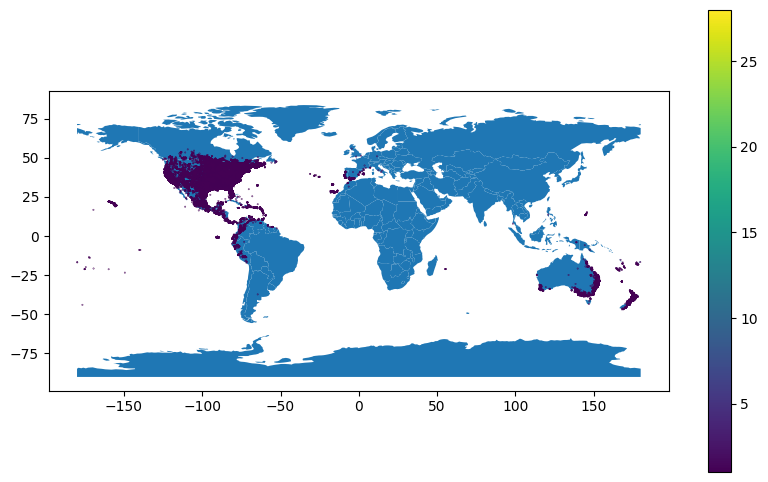

In [41]:
from shapely.geometry import Point
import geopandas as gpd
import numpy as np

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']))   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(10, 6)), column=df['countOccurrences'], markersize=0.1, legend=True)  

In [32]:
df.countryCode.unique().shape[0]

72

In [43]:
df_country_subset = df.groupby("countryCode").sample(frac=0.1, random_state=42)

/tmp/ipykernel_1663536/3858428779.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

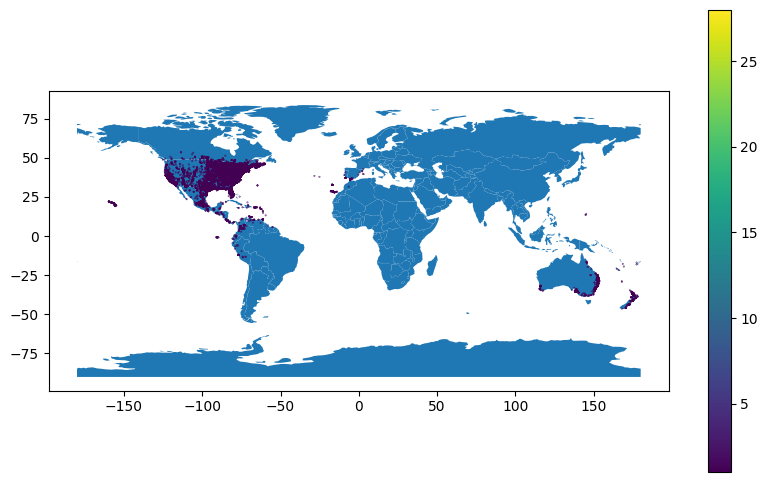

In [44]:
gdf = gpd.GeoDataFrame(df_subset, geometry=gpd.points_from_xy(df_country_subset['decimalLongitude'], df_country_subset['decimalLatitude']))   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(10, 6)), column=df_country_subset['countOccurrences'], markersize=0.1, legend=True)  

In [45]:
df_country_subset

,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences
37754,Danaus plexippus,2019-07-01 10:18:00,17.007319,-61.764990,AG,1
225102,Danaus plexippus,2025-02-09 13:46:48,18.253125,-63.033825,AI,1
147249,Danaus plexippus,2022-10-28 21:00:00,-28.258625,153.401607,AU,1
228706,Danaus plexippus,2025-05-01 12:38:00,-28.123067,153.188842,AU,1
176978,Danaus plexippus,2023-09-16 09:33:00,-27.975722,152.342971,AU,1
...,...,...,...,...,...,...
225150,Danaus plexippus,2025-02-11 07:11:16,10.277457,-68.001919,VE,1
22224,Danaus plexippus,2018-06-19 07:16:39,18.358417,-64.971138,VI,1
21846,Danaus plexippus,2018-06-01 13:19:42,18.326197,-64.902672,VI,1
157909,Danaus plexippus,2023-06-20 12:24:45,-17.791863,168.550164,VU,1


In [49]:
df_subset = df.sample(frac=0.005, random_state=42)

/tmp/ipykernel_1663536/3833117246.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

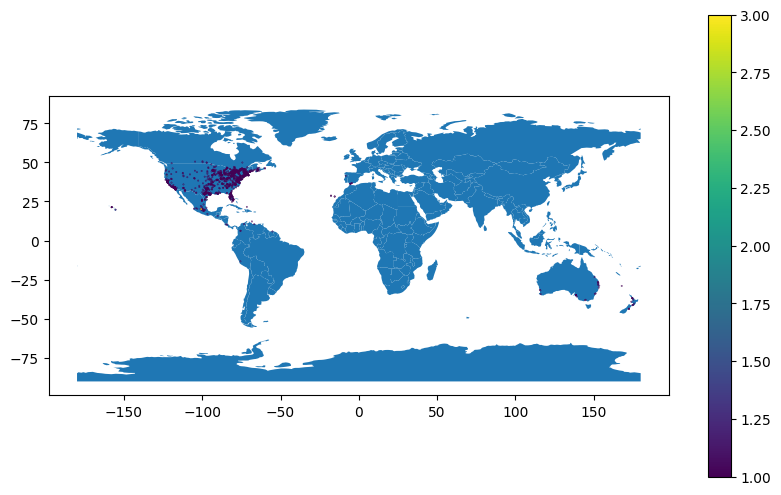

In [50]:
gdf = gpd.GeoDataFrame(df_subset, geometry=gpd.points_from_xy(df_subset['decimalLongitude'], df_subset['decimalLatitude']))   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(10, 6)), column=df_subset['countOccurrences'], markersize=0.1, legend=True)  

In [51]:
df_subset

,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences
124603,Danaus plexippus,2022-07-16 14:06:28,45.280114,-75.688482,CA,1
173005,Danaus plexippus,2023-08-31 11:23:00,43.100653,-71.286238,US,1
211807,Danaus plexippus,2024-09-06 15:00:53,43.186908,-71.553285,US,1
82301,Danaus plexippus,2021-04-11 15:52:00,30.333068,-96.159438,US,1
205001,Danaus plexippus,2024-08-10 11:52:57,44.059670,-91.656988,US,1
...,...,...,...,...,...,...
52777,Danaus plexippus,2019-10-15 14:12:50,35.899783,-79.032530,US,1
18728,Danaus plexippus,2017-10-14 09:46:29,30.736983,-97.575268,US,1
166899,Danaus plexippus,2023-08-07 11:52:10,43.776067,-79.139572,CA,1
226241,Danaus plexippus,2025-03-21 12:01:00,26.139232,-97.175936,US,1


In [61]:
df_months = df.copy()
df_months['month'] = [int(i.split('-')[1]) for i in df['dateOcurrence']]

In [62]:
df_months

,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences,month
0,Danaus plexippus,2000-01-29 19:46:00,35.263600,-120.638700,US,1,1
1,Danaus plexippus,2000-01-29 20:14:00,35.263712,-120.638812,US,1,1
2,Danaus plexippus,2000-01-29 20:15:00,35.263638,-120.638652,US,1,1
3,Danaus plexippus,2000-02-28 21:44:00,20.607068,-103.341398,MX,1,2
4,Danaus plexippus,2000-04-27 16:20:00,36.099136,-112.089027,US,1,4
...,...,...,...,...,...,...,...
280204,Danaus plexippus,2025-10-21 17:05:35,33.012233,-83.734720,US,1,10
280205,Danaus plexippus,2025-10-21 17:19:44,33.465848,-82.230231,US,1,10
280206,Danaus plexippus,2025-10-21 17:30:21,36.704885,-76.236060,US,1,10
280207,Danaus plexippus,2025-10-21 18:22:53,-32.340301,116.013917,AU,1,10


/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

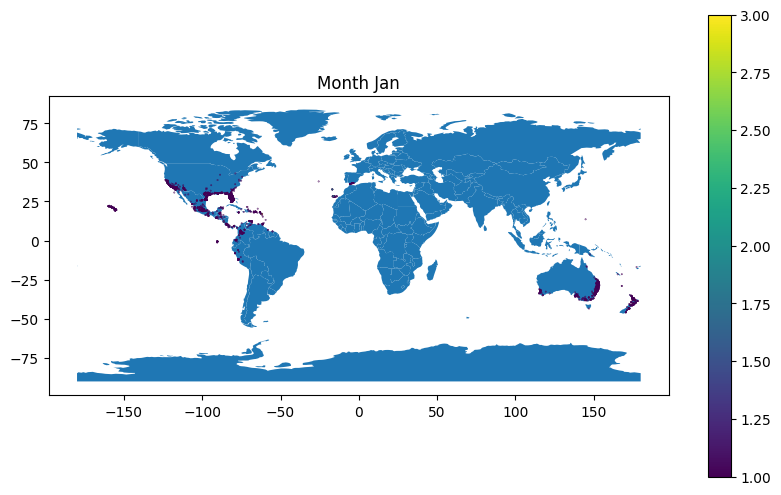

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

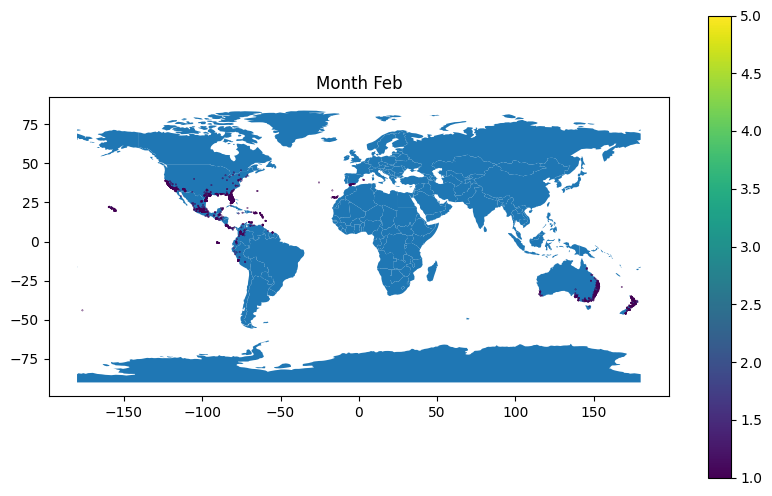

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

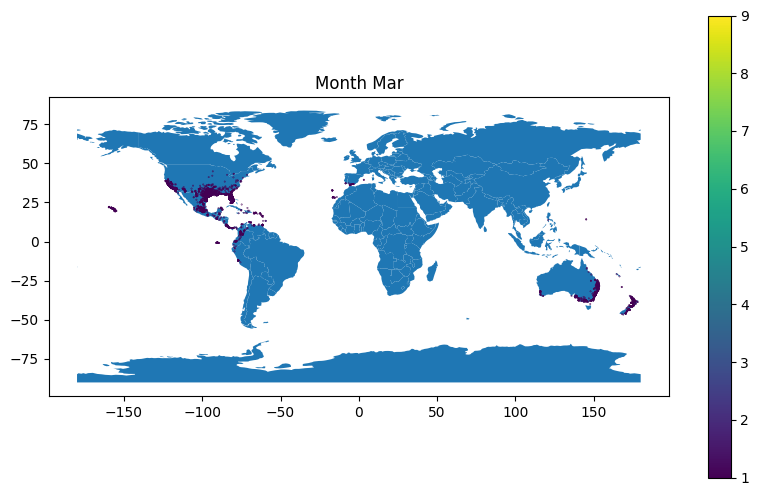

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

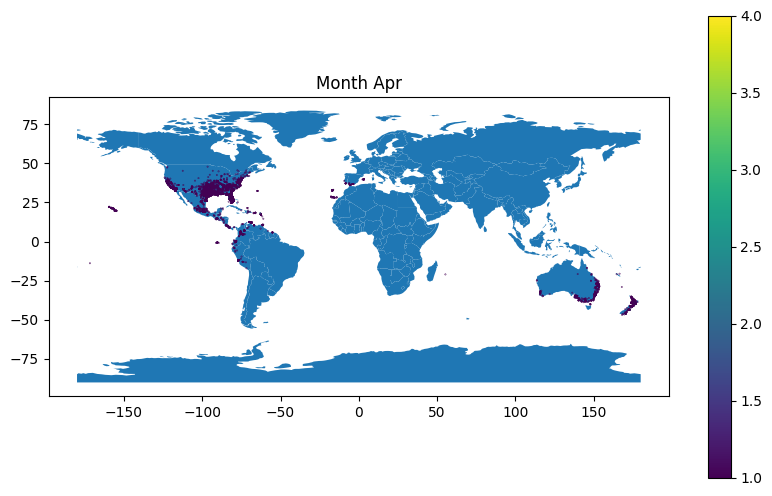

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

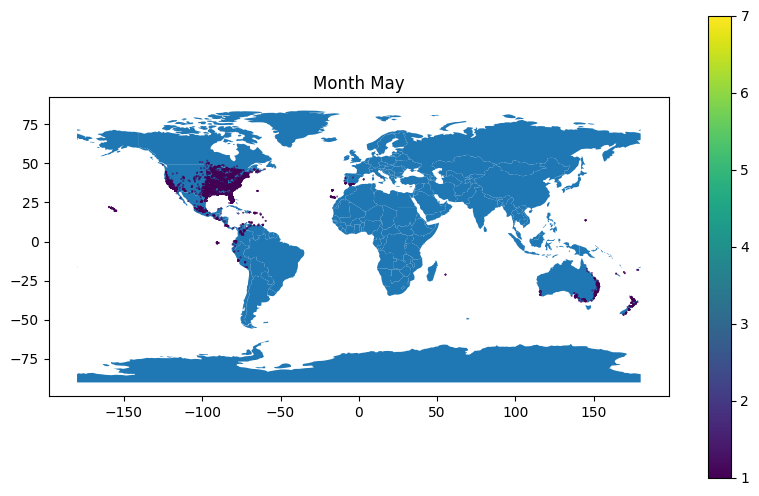

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

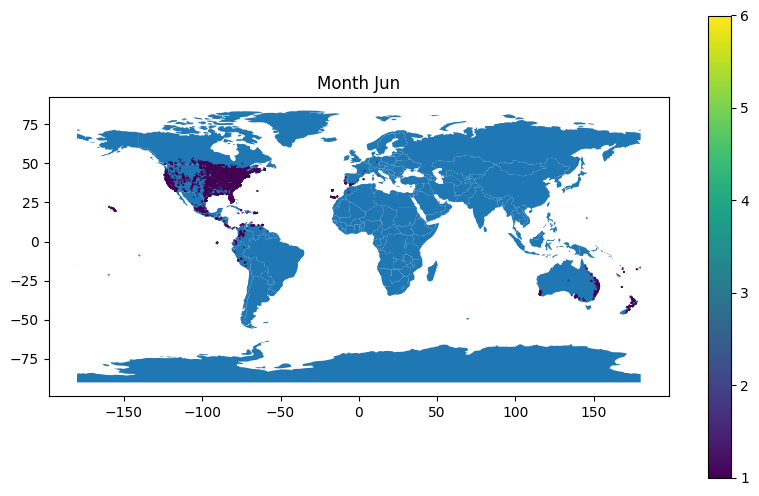

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

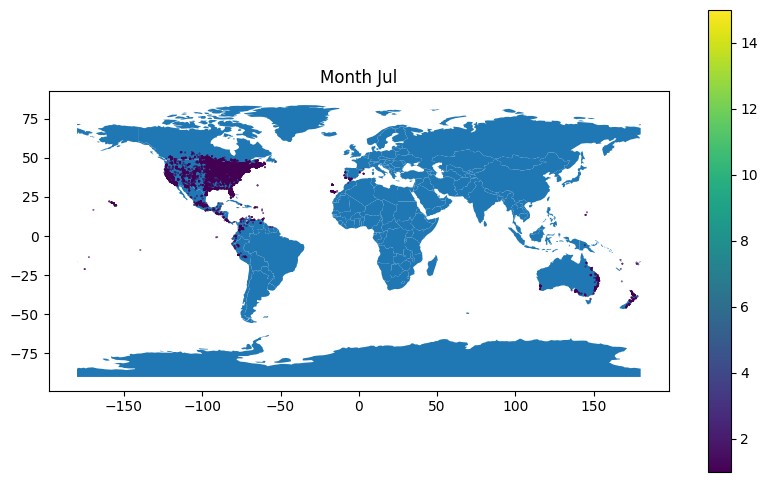

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

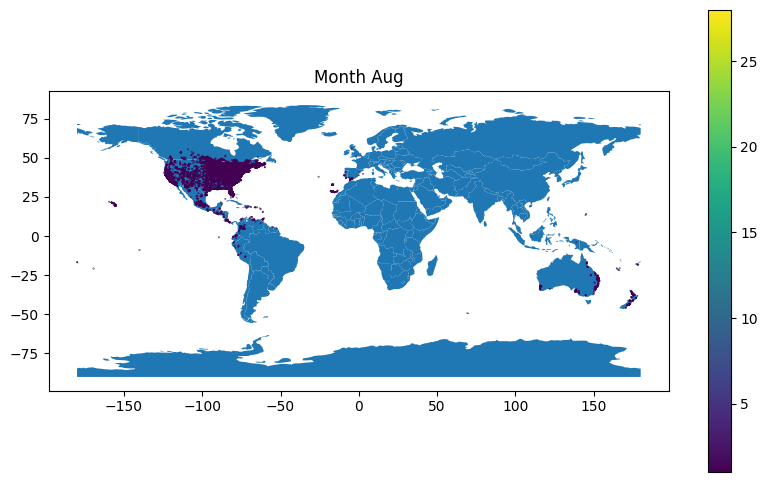

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

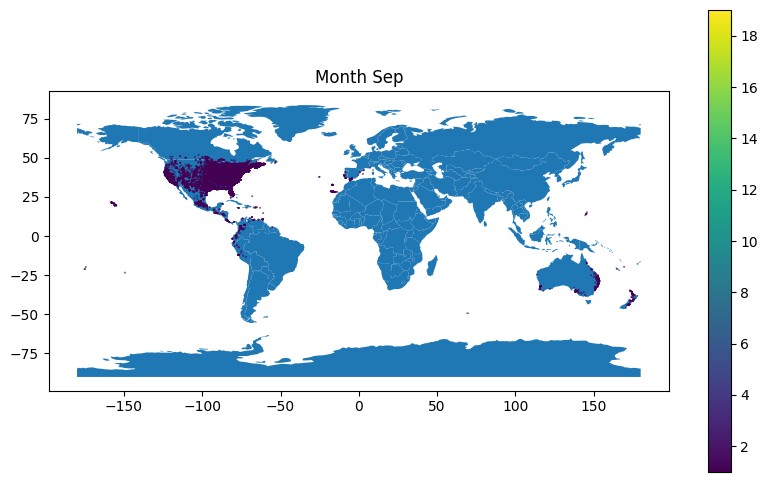

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

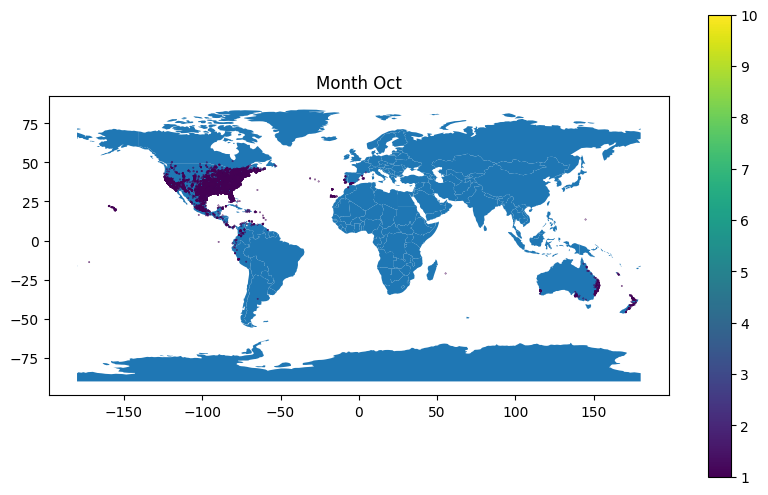

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

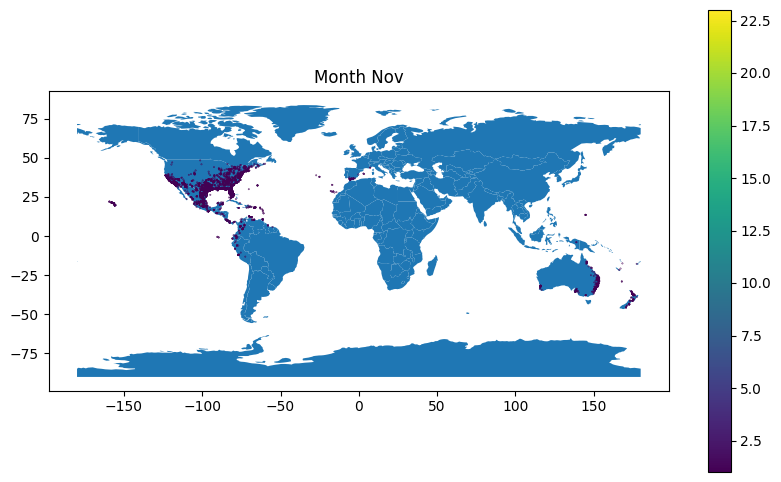

/tmp/ipykernel_1663536/1477535117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

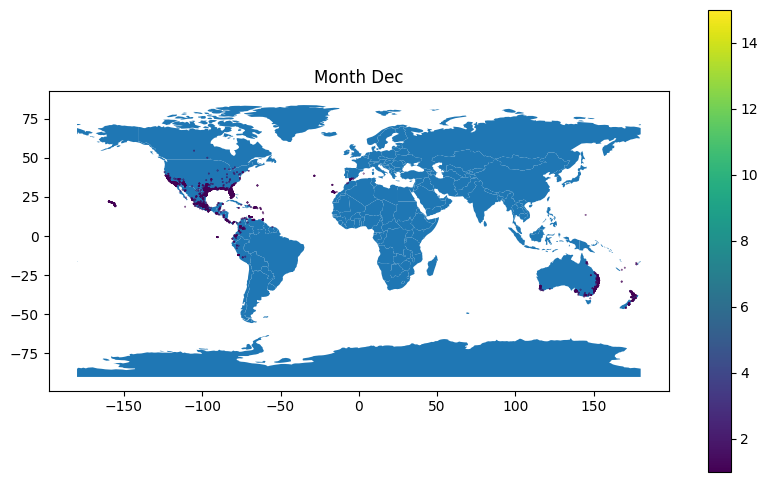

In [66]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(1, 13):
    plt.figure()
    gdf = gpd.GeoDataFrame(df_months[df_months['month'] == i], geometry=gpd.points_from_xy(df_months[df_months['month'] == i]['decimalLongitude'], df_months[df_months['month'] == i]['decimalLatitude']))   
    
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    gdf.plot(ax=world.plot(figsize=(10, 6)), column=df_months[df_months['month'] == i]['countOccurrences'], markersize=0.1, legend=True)
    plt.title(f"Month {months[i-1]}")
    plt.show()

In [63]:
df_months[df_months['month'] == 1]

,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences,month
0,Danaus plexippus,2000-01-29 19:46:00,35.263600,-120.638700,US,1,1
1,Danaus plexippus,2000-01-29 20:14:00,35.263712,-120.638812,US,1,1
2,Danaus plexippus,2000-01-29 20:15:00,35.263638,-120.638652,US,1,1
121,Danaus plexippus,2004-01-01 00:00:00,15.386149,-87.808854,HN,1,1
122,Danaus plexippus,2004-01-01 00:00:00,35.951702,-78.990551,US,1,1
...,...,...,...,...,...,...,...
224911,Danaus plexippus,2025-01-31 15:41:32,-43.637320,172.485788,NZ,1,1
224912,Danaus plexippus,2025-01-31 16:53:00,18.351853,-68.831537,DO,1,1
224913,Danaus plexippus,2025-01-31 16:58:59,-43.621893,172.384056,NZ,1,1
224914,Danaus plexippus,2025-01-31 17:20:38,28.584580,-81.360337,US,1,1


In [69]:
from datetime import datetime

In [70]:
date_format = '%Y-%m-%d %H:%M:%S'
datetime.strptime(df['dateOcurrence'][0], date_format)

datetime.datetime(2000, 1, 29, 19, 46)

In [72]:
df_years = df.copy()
df_years['year'] = [int(i.split('-')[0]) for i in df['dateOcurrence']]

In [76]:
year_counts = df_years.groupby('year').sum('countOccurrences')

<Axes: xlabel='year'>

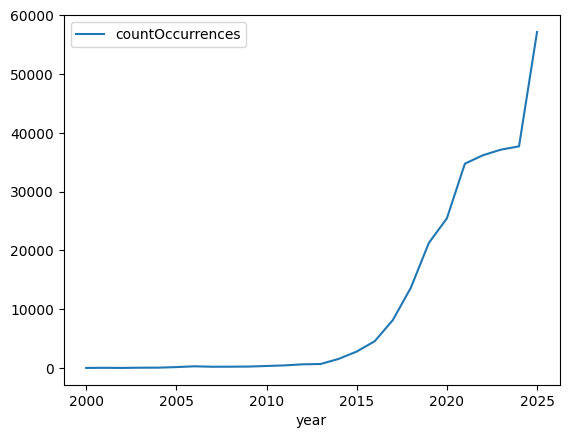

In [80]:
year_counts.plot(y='countOccurrences')

,verbatimScientificName,dateOcurrence,decimalLatitude,decimalLongitude,countryCode,countOccurrences
0,Danaus plexippus,2000-01-29 19:46:00,35.263600,-120.638700,US,1
1,Danaus plexippus,2000-01-29 20:14:00,35.263712,-120.638812,US,1
2,Danaus plexippus,2000-01-29 20:15:00,35.263638,-120.638652,US,1
3,Danaus plexippus,2000-02-28 21:44:00,20.607068,-103.341398,MX,1
4,Danaus plexippus,2000-04-27 16:20:00,36.099136,-112.089027,US,1
...,...,...,...,...,...,...
280204,Danaus plexippus,2025-10-21 17:05:35,33.012233,-83.734720,US,1
280205,Danaus plexippus,2025-10-21 17:19:44,33.465848,-82.230231,US,1
280206,Danaus plexippus,2025-10-21 17:30:21,36.704885,-76.236060,US,1
280207,Danaus plexippus,2025-10-21 18:22:53,-32.340301,116.013917,AU,1
